In [1]:
from skidl.pyspice import *
#can you say cheeky 
import PySpice as pspice
#becouse it's written by a kiwi you know
import lcapy as kiwi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym


from IPython.display import YouTubeVideo, display

import traceback
import warnings

In [2]:
#import dc code from parral folder
import sys
sys.path.insert(1, '../DC_1/')
from DC_1_Codes import get_skidl_spice_ref, dc_ease
#from AC_2_Codes import 

sym.init_printing()

#notebook specific loading control statements 
%matplotlib inline
#tool to log notebook internals
#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information skidl, PySpice,lcapy, sympy, numpy, matplotlib, pandas, scipy

Software,Version
Python,3.7.6 64bit [GCC 7.3.0]
IPython,7.12.0
OS,Linux 4.19.104 microsoft standard x86_64 with debian bullseye sid
skidl,0.0.31.dev0
PySpice,1.4.3
lcapy,0.75.dev0
sympy,1.6.2
numpy,1.18.1
matplotlib,3.3.0
pandas,1.1.4


In [3]:
reset()
net_in=Net('In'); net_out=Net('Out')

vs=SINEV(dc_offset=1.5@u_V)

Diode=A(
    io="pos, neg",
    model=XspiceModel(
        'diode',
        'sidiode',
        ron=0.7, 
        roff=1000,
        vfwd=1, 
        vrev=10,
        ilimt=7,
        revilimit=7,
        epsilon=0.2,
        revepsilon=0.2,
        rrev=0.2
    )
)

amm=V(ref='amm', dc_value=0@u_V)
rload=R(value=100@u_Ohm)

vs['p', 'n']+=net_in, gnd
Diode['pos', 'neg']+=net_in, net_out
rload[1, 2]+=net_out, amm['p']
amm['n']+=gnd


circ = generate_netlist(libs="SpiceLib")
print(circ)


Pin A1/0/pos/UNSPECIFIED True
Pin A1/1/neg/UNSPECIFIED True
.title 
V1 In 0 DC 1.5V AC 1V 0.0rad SIN(0V 1V 50Hz 0s 0Hz)
A1 In Out diode
Vamm N_1 0 0V
R1 Out N_1 100Ohm
.model diode sidiode (epsilon=0.2 ilimt=7 revepsilon=0.2 revilimit=7 roff=1000 ron=0.7 rrev=0.2 vfwd=1 vrev=10)




No errors or warnings found during netlist generation.



In [4]:
dc_sim=dc_ease(circ)
dc_sim.sweep_DF.at['V1']=0, 2, 0.001
dc_sim.sweep_DF

,Start,Stop,Step
Element,,,
V1,0,2,0.001
Vamm,NaN,NaN,NaN


In [5]:
dc_sim.do_dc_sim('V1')
res=dc_sim.dc_resultsNB_DF; res

,In_[V],Out_[V],N_1_[V],V1_[A],Vamm_[A]
V1,,,,,
0.000,0.000,0.000000,0.0,-0.000000e+00,-0.000000e+00
0.001,0.001,0.000091,0.0,9.090909e-07,-9.090909e-07
0.002,0.002,0.000182,0.0,1.818182e-06,-1.818182e-06
0.003,0.003,0.000273,0.0,2.727273e-06,-2.727273e-06
0.004,0.004,0.000364,0.0,3.636364e-06,-3.636364e-06
...,...,...,...,...,...
1.996,1.996,1.044427,0.0,1.044427e-02,-1.044427e-02
1.997,1.997,1.045400,0.0,1.045400e-02,-1.045400e-02
1.998,1.998,1.046374,0.0,1.046374e-02,-1.046374e-02


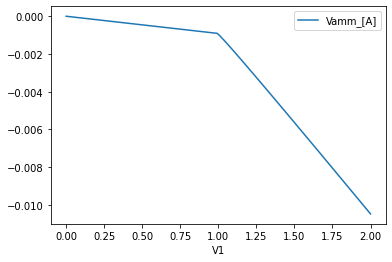

In [6]:
res.plot(y='Vamm_[A]');

In [7]:
sim = circ.simulator()
disres=sim.distortion('dec', '20', 1@u_Hz, 10@u_GHz)
disres

In [8]:
disres.nodes

{'n_1': WaveForm n_1 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 